![](img/571_lab_banner.png)

# Lab 1: Decision trees and machine learning fundamentals

<br><br>

## Imports

In [1]:
import re
import sys
from hashlib import sha1

from IPython.display import Image

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

<br><br>

## Submission instructions
<hr>
rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **Please add a link to your GitHub repository here: LINK TO YOUR  REPO**
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Make at least three commits in your lab's GitHub repository.
- Push the final .ipynb file with your solutions to your GitHub repository for this lab.
- Upload the .ipynb file to Gradescope. When you access Gradescope for this course for the first time, please access it via [Canvas](https://canvas.ubc.ca/courses/102040). 
- If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.
- Make sure that your plots/output are rendered properly in Gradescope. 

> [Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.


> Note: The data you download for this lab **SHOULD NOT BE PUSHED TO YOUR REPOSITORY**. I have seeded the repository with `.gitignore` and hoping that it won't let you push CSVs.

<br><br>

## Exercise 1: Warm-up: Decision trees with a toy dataset 
<hr>

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, whether there is work-hour flexibility, and whether the company is a start-up or not. So the `X` of your offer data looks as follows: 

In [2]:
offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0, 1],
    "work_hour_flexibility": [0, 0, 1, 1],
    "start_up": [0, 1, 1, 1],    
}

offer_df = pd.DataFrame(offer_data)
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


Your goal is to get predictions for these rows. In other words, for each row, you want to predict whether that job would make you **happy** or **unhappy**.   

So you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy in your job? (happy or unhappy)

Suppose you get the following data from this toy survey. You decide to train a machine learning model using this toy survey data and use this model to predict which job from `offer_df` is likely to make you happy. 

In [3]:
import pandas as pd

happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


<br><br>

### 1.1 Decision stump by hand 
rubric={autograde:2}

**Your tasks:**

With this toy dataset, build a decision stump (decision tree with only 1 split) by hand, splitting on the condition `supportive_colleagues <= 0.5`. What training accuracy would you get with this decision stump? Save the accuracy as a decimal in an object named `supportive_colleagues_acc`. 

> You do not have to show any calculations or code. 

<div class="alert alert-warning">

Solution_1.1
    
</div>

In [4]:
supportive_colleagues_acc = None

# BEGIN SOLUTION

supportive_colleagues_acc = 0.9

# END SOLUTION

In [5]:
assert not supportive_colleagues_acc is None, "Are you setting the provided variable?"
assert (
    sha1(str(supportive_colleagues_acc).encode("utf8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "Your answer is incorrect, see traceback above."

<br><br>

### 1.2 Separating features and target
rubric={autograde:2}

Recall that in `scikit-learn`, before building a classifier, we need to separate features and target. 

**Your tasks:**

1. Separate features and target from `train_df` and save them in `X_train_toy` and `y_train_toy`, respectively. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

In [6]:
X_train_toy = None
y_train_toy = None

# BEGIN SOLUTION

X_train_toy = train_df.drop(columns=["target"])
y_train_toy = train_df["target"]

# END SOLUTION

In [7]:
assert not X_train_toy is None, "Are you using the correct variable?"
assert not y_train_toy is None, "Are you using the correct variable?"
assert X_train_toy.shape == (10, 3), "X_train_toy shape is incorrect"
assert y_train_toy.shape == (10,), "y_train_toy shape is incorrect"

<br><br>

### 1.3 Create a decision tree classifier object
rubric={autograde:1}

**Your tasks:**

1. Create a `DecisionTreeClassifier` object with `random_state=16` and store it in a variable called `toy_tree`.

<div class="alert alert-warning">

Solution_1.3
    
</div>

In [8]:
toy_tree = None

# BEGIN SOLUTION

# instantiate a class of the DecisionTreeClassifier
toy_tree = DecisionTreeClassifier(random_state=16)

# END SOLUTION

In [9]:
assert isinstance(toy_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
assert (toy_tree.get_params().get("random_state") == 16), "Please set the random state to 16"

<br><br>

### 1.4 `fit` the decision tree classifier 
rubric={autograde:1}

**Your tasks:**

1. Now train a decision tree model by calling `fit` on `toy_tree` with `X_train_toy` and `y_train_toy` created above. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

In [10]:
# BEGIN SOLUTION

# fit the model to the data. The semicolon at the end is used to suppress displaying the output of model.fit
toy_tree.fit(X_train_toy, y_train_toy)

# END SOLUTION

DecisionTreeClassifier(random_state=16)

In [11]:
assert toy_tree.get_depth() in range(2, 4, 1), "DecisionTreeClassifier was not fitted properly"
assert toy_tree.get_n_leaves() in range(3, 5, 1), "DecisionTreeClassifier was not fitted properly"

<br><br>

### 1.5 Visualize the trained decision tree
rubric={autograde:2}

**Your tasks:**

1. Visualize the trained decision tree model using the `graphviz` package and the following helper code from the lecture notes. Pass `counts=True` when you call the function. Save the visualization tree returned by the function below in a variable called `toy_tree_viz`.  

In [12]:
def display_tree(feature_names, tree, counts=False):
    """For binary classification only"""
    dot = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=tree.classes_.astype(str),
        impurity=False,
    )
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    # dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    if counts:
        dot = re.sub("(samples = [0-9]+)\\\\n", "", dot)
        dot = re.sub("value", "counts", dot)
    else:
        dot = re.sub(
            "(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])", "", dot
        )
        dot = re.sub(
            "(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n", "", dot
        )

    return graphviz.Source(dot)

<div class="alert alert-warning">

Solution_1.5
    
</div>

In [13]:
toy_tree_viz = None

# BEGIN SOLUTION
toy_tree_viz = display_tree(X_train_toy.columns, toy_tree, counts=True)
# END SOLUTION

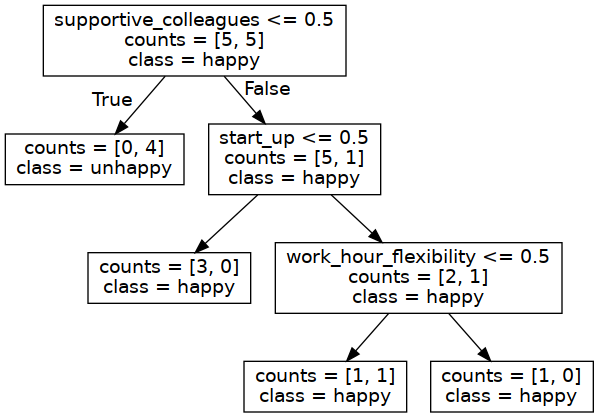

In [14]:
# Assuming that you have correctly set the variable toy_tree_viz
# the following code makes sure the tree is shown on Gradescope.
Image(toy_tree_viz.pipe("png"))

In [15]:
assert not toy_tree_viz is None, "Are you using the provided variable?"
assert not toy_tree_viz.source is None, "toy_displayed should be a decision tree"

In [16]:
# HIDDEN
toy_tree_soln = display_tree(X_train_toy.columns, toy_tree, counts=True)
assert (toy_tree_viz.source == toy_tree_soln.source)

<br><br>

### 1.6 Depth of the tree
rubric={autograde:1}

**Your tasks:**

1. What's the depth of the learned decision tree model? Save it as an integer in the variable `toy_depth` below. 

<div class="alert alert-warning">

Solution_1.6
    
</div>

In [17]:
toy_depth = None

# BEGIN SOLUTION
toy_depth = 3
# END SOLUTION

In [18]:
assert not toy_depth is None, "Are you using the provided variable?"
assert (sha1(str(toy_depth).encode("utf-8")).hexdigest() == "77de68daecd823babbb58edb1c8e14d7106e83bb"), "The depth is incorrect"

<br><br>

### 1.7 Accuracy calculation
rubric={autograde:1}

**Your tasks:**

1. Evaluate the `toy_tree` on the training data (i.e., call `score()` on `X_train_toy` and `y_train_toy`) and store the score in a variable called `train_acc`.

<div class="alert alert-warning">

Solution_1.7
    
</div>

In [19]:
train_acc = None

# BEGIN SOLUTION
train_acc = toy_tree.score(X_train_toy, y_train_toy)
train_acc
# END SOLUTION

0.9

In [20]:
assert not train_acc is None, "Are you using the provided train_acc variable?"
assert (sha1(str(np.round(train_acc, 2)).encode("utf-8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "The score is incorrect"

<br><br>

### 1.8 Discussion
rubric={reasoning:2}

**Your tasks:**

1. Do you get perfect training accuracy? Why or why not? 

<div class="alert alert-warning">

Solution_1.8
    
</div>

We do not get perfect training accuracy. Notice that the model made an "error" on example with index 8; the original target is "unhappy" and the predicted one is "happy". This is because we have some inconsistency in the training data; we have two examples in the dataset with exactly the same feature vectors but different targets.

<br><br>

### 1.9 Predicting on the offer data 
rubric={autograde:3}

Recall that our goal is to predict in which jobs you are likely to be happy. The `offer_df` dataframe below has all the job offers you have received. 

**Your tasks:**

1. Using the trained decision tree above, predict the targets for all examples in `offer_df` and store them as a list in the `predictions` variable below. In which jobs you are likely to be happy? Add index(es) of all examples where you are likely to be happy to the `happy_job_indices` list below.

In [21]:
offer_df

,supportive_colleagues,work_hour_flexibility,start_up
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1


<div class="alert alert-warning">

Solution_1.9
    
</div>

In [22]:
predictions = []
happy_job_indices = []

# BEGIN SOLUTION
predictions = toy_tree.predict(offer_df).tolist()
happy_job_indices = [i for (i, pred) in enumerate(predictions) if pred == "happy"]
# END SOLUTION

In [23]:
assert not predictions is None, "Are you storing predictions in the provided variable predictions?"
assert predictions.count("happy") == 2, "Your predictions do not look as expected."
assert predictions.count("unhappy") == 2, "Your predictions do not look as expected."

In [24]:
assert not happy_job_indices is None, "Are you storing the happy job indices in the provided variable?"
assert len(happy_job_indices) == 2, "The length of happy_job_indices list seems wrong. "
assert sha1(str(sorted(happy_job_indices)).encode('utf-8')).hexdigest() == 'c48ac7e6c9a92c1a4160e3096f915d1651e6c18f', "The happy job indices do not look correct."

<br><br><br><br>

## Exercise 2: Decision trees on Spotify Song Attributes dataset <a name="2"></a>
<hr>

### Introducing the dataset
  
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. **Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory in this folder.** 

> You will not be able to push it to your repository (hopefully) because I have seeded the repository with `.gitignore`. 

### 2.1 Reading the data CSV
rubric={autograde:2}
 
**Your tasks:**
1. Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

> Make sure you have put the data CSV as `spotify.csv` under the data directory (data/spotify.csv). When you read the data file, use this relative path for the autograder to work properly on Gradescope. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

In [25]:
spotify_df = None

# BEGIN SOLUTION

spotify_df = pd.read_csv("data/spotify.csv", index_col=0)
spotify_df.head()

# END SOLUTION

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [26]:
assert isinstance(spotify_df, pd.DataFrame), "The DataFrame is not loaded correctly"
assert spotify_df.shape == (2017, 16), "The DataFrame has the wrong shape"
assert np.isclose(spotify_df.valence.sum(), 1002.08), "The DataFrame is not loaded correctly"

In [27]:
assert (not spotify_df.columns[0] != "acousticness"), "Perhaps you haven't set the first column as an index column"
assert spotify_df.index.dtype == "int64", "Your index dtype is incorrect"

<br><br>

### 2.2 Data splitting 
rubric={autograde:2}

**Your tasks:**

1. Split the dataframe into `train_df` and `test_df` with `random_state=123` and `test_size=0.2`. 


<div class="alert alert-warning">

Solution_2.2
    
</div>

In [28]:
train_df = None
test_df = None

# BEGIN SOLUTION
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)
# END SOLUTION

In [29]:
assert (not train_df is None and not test_df is None), "Are you using the provided variables?"
n_total_samples = spotify_df.shape[0]
assert test_df.shape[0] == round(n_total_samples * 0.2) + (n_total_samples % 5 > 0), "Are you using the provided test size?"

In [30]:
assert np.isclose(train_df.iloc[30]["liveness"], 0.268), "Are you using the provided random state?"
assert np.isclose(test_df.iloc[88]["danceability"], 0.727), "Are you using the provided random state?"

<br><br>

### 2.3 Number of training and test examples
rubric={autograde:1}

**Your tasks:**
1. How many training and test examples do we have? Store them as integers in the variables below. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

In [31]:
# Please provide integer values
n_train_samples = None
n_test_samples = None

# BEGIN SOLUTION
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]
# END SOLUTION

In [32]:
assert not n_train_samples is None, "n_train_samples not set"
assert not n_test_samples is None, "n_test_samples not set."
assert (sha1(str(n_train_samples).encode("utf8")).hexdigest() == "2a7bcf3804dc71895222bdd5f95e64444ce51654"), "n_train_samples is not set correctly."
assert (sha1(str(n_test_samples).encode("utf8")).hexdigest() == "c35a9fc52bb556c79f8fa540df587a2bf465b940"), "n_test_samples is not set correctly."

<br><br>

### 2.4 `describe` method 
rubric={autograde:2}

**Your tasks:**

1. Store the output of `describe()` **on the training split** in `spotify_summary` variable below and display the summary statistics. By default, this function will compute some summary statistics of the numeric columns.

> Note that `describe` returns another DataFrame.

<div class="alert alert-warning">

Solution_2.4
    
</div>

In [33]:
spotify_summary = None

# BEGIN SOLUTION
spotify_summary = train_df.describe()
spotify_summary
# END SOLUTION

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185627,0.616745,247114.827650,0.681296,0.136862,5.383137,0.189189,-7.112929,0.621203,0.091277,121.979777,3.964662,0.497587,0.507750
std,0.259324,0.163225,81177.300308,0.211612,0.277744,3.620422,0.153170,3.838867,0.485238,0.087890,26.965641,0.255201,0.247378,0.500095
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009190,0.511000,200105.000000,0.564000,0.000000,2.000000,0.092300,-8.388000,0.000000,0.037300,100.518000,4.000000,0.295000,0.000000
50%,0.062500,0.629000,230200.000000,0.714000,0.000071,6.000000,0.127000,-6.248000,1.000000,0.054900,121.990000,4.000000,0.496000,1.000000
75%,0.251000,0.738000,272533.000000,0.844000,0.057300,9.000000,0.243000,-4.791000,1.000000,0.107000,137.932000,4.000000,0.690000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [34]:
assert isinstance(spotify_summary, pd.DataFrame), "Are you storing the dataframe in spotify_summary?"
assert spotify_summary.shape == (8, 14), "Please call describe"
assert np.isclose(round(spotify_summary.iloc[2]["energy"], 3), 0.212), "Please call describe"
assert [round(x, 2) for x in sorted(list(spotify_summary["mode"]))] == [0.00,0.00,0.49,0.62,1.00,1.00,1.00,1613.00], "Please call describe"

<br><br>

### 2.5 Largest range feature
rubric={autograde:2}

**Your tasks:**

1. Which feature has the largest range? Store the feature name as a string in the `largest_range_feature` variable below.

> Hint: You can subtract the min value from the max value of the column to get the range.

<div class="alert alert-warning">

Solution_2.5
    
</div>

In [35]:
largest_range_feature = None

# BEGIN SOLUTION
largest_range_feature = (
    (spotify_summary.loc["max"] - spotify_summary.loc["min"])
    .sort_values(ascending=False)
    .index[0]
)
# END SOLUTION

In [36]:
assert not largest_range_feature is None, "Are you using the provided variable?"
assert (sha1(str(largest_range_feature.lower()).encode("utf8")).hexdigest() == "b2b3efacda1eba27a1e3780616a92b9563c33a59"), "Please use the exact column/feature name"

<br><br>

### 2.6 Plotting histograms 
rubric={viz:5}

The starter code below produces histograms for the `loudness` feature using pandas plotting. The histograms show the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using `matplotlib` and pandas plotting here. This is a manually graded question and you can use altair instead, as you're learning it in DSCI 531.  

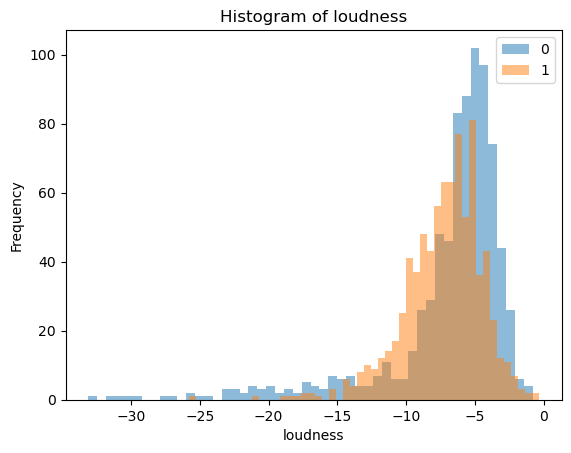

In [37]:
feat = "loudness"
train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True, title = "Histogram of " + feat);
plt.xlabel(feat);

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_2.6
    
</div>

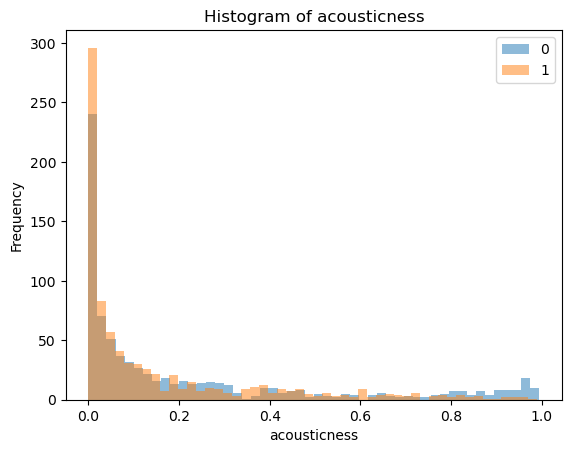

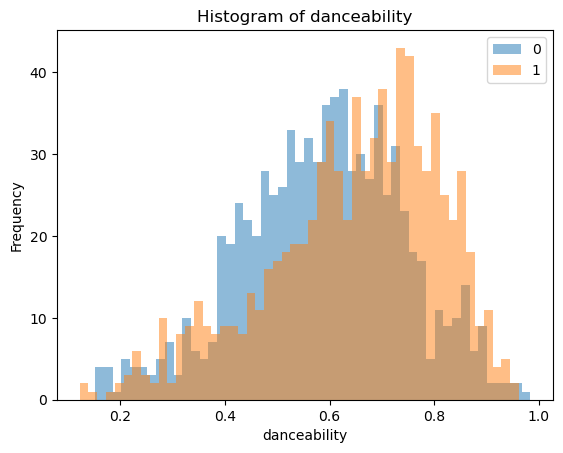

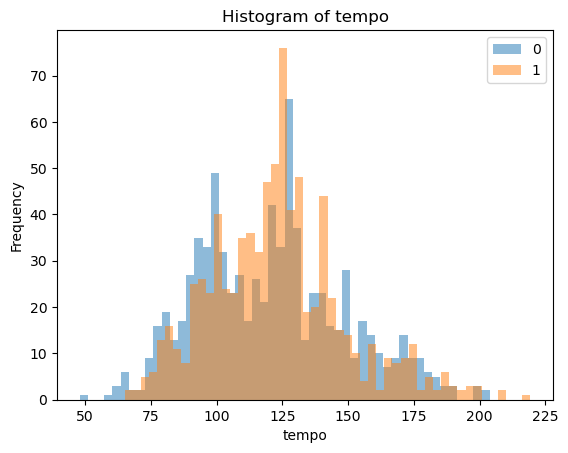

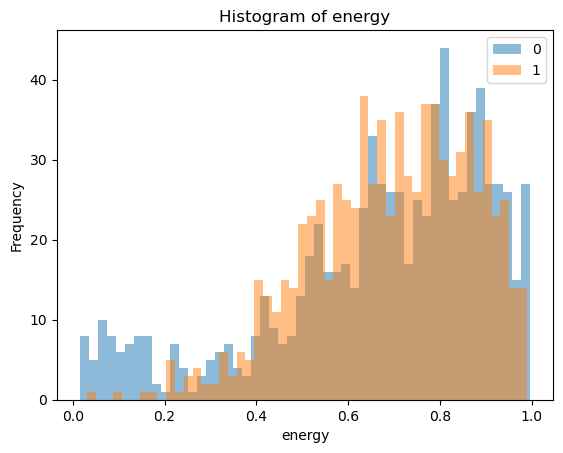

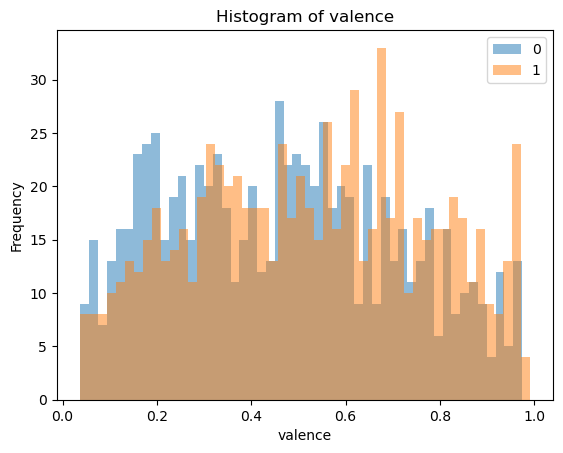

In [38]:
# BEGIN SOLUTION
features = [
    "acousticness",
    "danceability",
    "tempo",
    "energy",
    "valence",
]
for feat in features:
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True, title="Histogram of " + feat)
    plt.xlabel(feat)
    plt.show()
# END SOLUTION

<br><br>

### 2.7 Identical histograms
rubric={reasoning:2}

**Your tasks:**

1. Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class? Briefly explain. 

<div class="alert alert-warning">

Solution_2.7
    
</div>

No, the feature might still be useful, because it may be predictive in conjunction with other features. For example, the valence feature histograms (above) do indeed look quite overlapping. But it may be the case that very high valence in conjunction with low tempo is very predictive of a liked song. This type of pattern would not emerge in these individual histograms, but a decision tree could potentially still learn it.

<br><br>

### 2.8 Which columns to include? 
rubric={reasoning:4}

Note that the dataset includes two text features labeled `song_title` and `artist`.

**Your tasks:**

1. Do you think these features could be useful in predicting whether the user liked the song or not? Why or why not? 
2. Would there be any difficulty in using these features, in the form they are, in your model? Briefly explain.    

<div class="alert alert-warning">

Solution_2.8
    
</div>

The `song_title` and `artist` features can definitely be useful in predicting whether the user liked the song or not. For example, the user can have a strong preference for an artist or particular particular kind of songs. That said, free text columns are a bit tricky to use directly in your `X`; they need to encoded in numbers so that we can use them in machine learning models. These columns could also be considered as categorical columns rather than free text columns but too many unique categories might be a problem. One way to deal with this could be first categorizing them into more coarse-grained categories and then treating them as categorical variables. 

<br><br><br><br>

## Exercise 3: Model building
<hr>

Now that we did some preliminary exploratory data analysis (EDA), let's move on to modeling. 

<br><br>

### 3.1 Creating `X` and `y`
rubric={autograde:2}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` from the previous exercise and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

In [39]:
X_train = None
y_train = None
X_test = None
y_test = None

# BEGIN SOLUTION
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

# END SOLUTION

In [40]:
assert isinstance(X_train, pd.DataFrame), "X_train is not created correctly"
assert isinstance(y_train, pd.Series), "y_train is not created correctly"
assert isinstance(X_test, pd.DataFrame), "X_test is not created correctly"
assert isinstance(y_test, pd.Series), "y_test is not created correctly"
assert X_train.shape == (1613, 13), "X_train has the wrong shape"
assert X_test.shape == (404, 13), "X_test has the wrong shape"

<br><br>

<br><br>

### 3.2 The baseline model: `DummyClassifier`
rubric={autograde:2}

**Your tasks:**
1. Carry out 10-fold cross-validation using `DummyClassifier` with `random_state=123`. Store the mean cross-validation score in the `dummy_score` variable below. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

In [41]:
dummy_score = None
# BEGIN SOLUTION
dummy = DummyClassifier(random_state=123)
dummy_score = cross_val_score(dummy, X_train, y_train, cv=10).mean()
dummy_score
# END SOLUTION

0.5077524729698643

In [42]:
assert not dummy_score is None, "Are you using the provided variable?"
assert (sha1(str(round(dummy_score, 3)).encode("utf8")).hexdigest() == "18c726bc32625cbbb170d7b4127af31fae7c6270"), "DummyClassifier score seems incorrect"

<br><br>

### 3.3
rubric={autograde:2}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.

<div class="alert alert-warning">

Solution_3.3
    
</div>

In [43]:
spotify_tree = None

# BEGIN SOLUTION
spotify_tree = DecisionTreeClassifier(random_state=123)
# END SOLUTION

In [44]:
assert isinstance(spotify_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
assert (spotify_tree.get_params().get("random_state") == 123), "Please set the random state to 123"

<br><br>

### 3.4 Cross-validation with `DecisionTreeClassifier`
rubric={autograde:4}

**Your tasks:** 

1. Carry out 10-fold cross validation with the `spotify_tree` object above using `cross_validate` on `X_train` and `y_train`. Pass `return_train_score=True` to `cross_validate`. Save the results as a pandas dataframe in a variable called `dt_scores_df`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

In [45]:
dt_scores_df = None

# BEGIN SOLUTION
dt_scores_df = pd.DataFrame(
    cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
)
dt_scores_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.013528,0.001951,0.722222,0.999311
1,0.014359,0.001554,0.660494,1.000000
2,0.014213,0.001339,0.660494,0.999311
3,0.014257,0.001407,0.677019,1.000000
4,0.013225,0.001271,0.695652,0.999311
5,0.013557,0.001147,0.652174,0.999311
6,0.013006,0.000974,0.658385,0.999311
7,0.013995,0.001027,0.608696,0.999311
8,0.013890,0.001082,0.683230,0.999311
9,0.013664,0.001040,0.695652,0.999311


In [46]:
assert isinstance(dt_scores_df, pd.DataFrame), "dt_scores_df should be a DataFrame"
assert len(dt_scores_df) == 10, "Please check parameters of `cross_validate`"

In [47]:
assert dt_scores_df.shape[0] == 10, "Are you carrying out 10-fold cross-validation?"
assert dt_scores_df.shape[1] == 4, "Are you passing return_train_scores = True?"

In [48]:
assert np.isclose(round(dt_scores_df["test_score"].mean(), 3), 0.671), "Your test scores are incorrect"
assert np.isclose(round(dt_scores_df["train_score"].mean(), 3), 0.999), "Your train scores are incorrect"

<br><br>

### 3.5 Examining cross-validation scores
rubric={reasoning:4}

**Your tasks:** 
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. To what extent do you trust the numerical value / precision of the cross validation score? Briefly explain.  
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences. 

<div class="alert alert-warning">

Solution_3.5
    
</div>

In [49]:
# BEGIN SOLUTION
dt_scores_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.013528,0.001951,0.722222,0.999311
1,0.014359,0.001554,0.660494,1.000000
2,0.014213,0.001339,0.660494,0.999311
3,0.014257,0.001407,0.677019,1.000000
4,0.013225,0.001271,0.695652,0.999311
5,0.013557,0.001147,0.652174,0.999311
6,0.013006,0.000974,0.658385,0.999311
7,0.013995,0.001027,0.608696,0.999311
8,0.013890,0.001082,0.683230,0.999311
9,0.013664,0.001040,0.695652,0.999311


In [50]:
# BEGIN SOLUTION
dt_scores_df.mean()
# END SOLUTION

fit_time       0.013769
score_time     0.001279
test_score     0.671402
train_score    0.999449
dtype: float64

Looks like there is quite a bit of variation in accuracies in different folds. The cv scores range from 0.60 to 0.72, so the range is fairly large. I would say I don't trust the 0.671 that much, certainly not to three or even two decimal places. I might say "around 0.62-0.70" or something like that.

The training accuracy is much higher than the cross-validation accuracy suggesting that the model is overfit on the training data. 

<br><br><br><br>

## Exercise 4: Hyperparameters <a name="4"></a>
<hr>

### 4.1 Train and cross-validation plots
rubric={autograde:12}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with the following values of `max_depth`: `np.arange(1, 25, 2)`. Set the `random_state` of `DecisionTreeClassifier` to 123 in each case for reproducibility. 
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation accuracies on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which and make sure each curve and the axes have the reasonable name. Save the plot to `max_depth_plot`.

> **For the autograder to work properly, use pandas plotting in this exercise, similar to how we did it in [the lecture notes](https://pages.github.ubc.ca/mds-2022-23/DSCI_571_sup-learn-1_students/lectures/02_ml-fundamentals.html#overfitting).**
> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [51]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_4.1
    
</div>

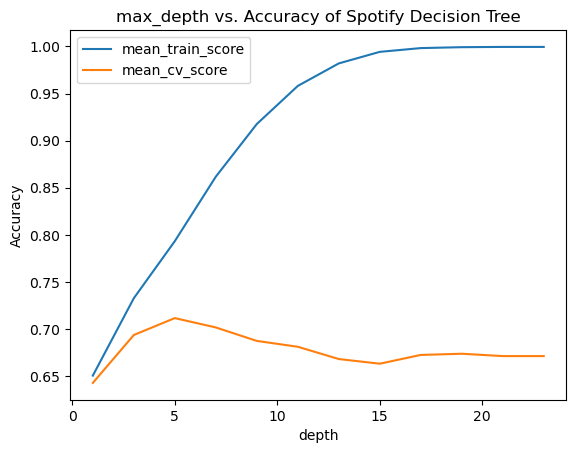

In [52]:
# max_depth_plot: the figure plotted for this exercise
max_depth_plot = None

# BEGIN SOLUTION
results_dict = {
    "depth": [],
    "mean_train_score": [],
    "mean_cv_score": [],
}
param_grid = {"max_depth": np.arange(1, 25, 2)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
max_depth_plot = results_df[["mean_train_score", "mean_cv_score"]].plot(title = "max_depth vs. Accuracy of Spotify Decision Tree", ylabel = "Accuracy")

# END SOLUTION

In [53]:
assert X_train.shape == (1613, 13), "Shape is incorrect"
assert y_train.shape == (1613,), "Shape is incorrect"
assert X_test.shape == (404, 13), "Shape is incorrect"
assert y_test.shape == (404,), "Shape is incorrect"

assert (round(X_train.iloc[123]["loudness"], 2) == -10.10), "Are you using the correct X_train, y_train, X_test, y_test?"
assert (round(y_train.iloc[62], 2) == 0.00), "Are you using the correct X_train, y_train, X_test, y_test?"
assert (round(X_test.iloc[234]["valence"], 2) == 0.18), "Are you using the correct X_train, y_train, X_test, y_test?"
assert (round(y_test.iloc[399], 2) == 1.00), "Are you using the correct X_train, y_train, X_test, y_test?"

In [54]:
assert not max_depth_plot is None, "Are you storing the plot in a variable?"
assert (len(max_depth_plot.lines) == 2), "Please plot both the train accuracy and the cross-validation accuracy"

In [55]:
# Check if the expected max_depths are on the x-axis
assert "depth" in max_depth_plot.get_xlabel().lower(), "Please give x-axis a reasonable name"
assert "accuracy" in max_depth_plot.get_ylabel().lower(), "Please give y-axis a reasonable name"
assert (max_depth_plot.lines[0].get_xdata() == np.arange(1, 25, 2)).all(), "Please use the provided max_depth values"
assert len(max_depth_plot.lines[1].get_xdata()) == len(np.arange(1, 25, 2)), "Please use the provided max_depth values"

In [56]:
# Check if the curves are labeled with reasonable names
assert any(label in max_depth_plot.legend().get_texts()[0].get_text().lower() for label in ["train", "test", "cv"]), "Please label your curves with reasonable names"
assert any(label in max_depth_plot.legend().get_texts()[1].get_text().lower().lower() for label in ["train", "test", "cv"]), "Please label your curves with reasonable names"

In [57]:
# Get train and test data points
legend_texts = max_depth_plot.legend().get_texts()
if "train" in legend_texts[0].get_text():
    train_xydata = max_depth_plot.lines[0].get_xydata()
    valid_xydata = max_depth_plot.lines[1].get_xydata()
else:
    train_xydata = max_depth_plot.lines[1].get_xydata()
    valid_xydata = max_depth_plot.lines[0].get_xydata()

# Training scores should increase when max_depth increases
assert np.isclose(round(train_xydata[2][1], 3), 0.794, atol=0.02), "The training data points are incorrect"
assert (train_xydata[6][1] >= train_xydata[2][1]), "The training data points are incorrect"
assert (train_xydata[10][1] >= train_xydata[6][1]), "The training data points are incorrect"

# Test scores
assert np.isclose(round(valid_xydata[2][1], 3), 0.718, atol=0.02), "The training data points are incorrect"
assert np.isclose(round(valid_xydata[6][1], 3), 0.678, atol=0.02), "The training data points are incorrect"
assert np.isclose(round(valid_xydata[10][1], 3), 0.679, atol=0.02), "The training data points are incorrect"

<br><br>

### 4.2 `max_depth` and the fundamental tradeoff
rubric={reasoning:3}

**Your tasks:**
1. Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. 

<div class="alert alert-warning">

Solution_4.2
    
</div>

In case of the training data, a higher value of `max_depth` parameter results in higher accuracy. For `max_depth >= 15` the accuracy is 1.0, which means that the model is able to classify all training examples perfectly. This happens because for higher `max_depth` values, the decision tree learns a specific rule for almost all examples in the training data. In case of the cross-validation scores, initially the accuracy increases a bit and then it goes back down. 


<br><br>

### 4.3 Picking the best value for `max_depth`
rubric={autograde:2}

**Your tasks:**
1. From these results, pick the "best" `max_depth`, the one which gives the maximum cross-validation score. Store it in a variable called `best_max_depth` as an integer. 

<div class="alert alert-warning">

Solution_4.3   
    
</div>

In [58]:
best_max_depth = None

# BEGIN SOLUTION
best_max_depth = results_df.index.values[np.argmax(results_df["mean_cv_score"])]
best_max_depth
# END SOLUTION

5

In [59]:
assert not best_max_depth is None, "Are you using the provided variable?"
assert sha1(str(best_max_depth).encode('utf-8')).hexdigest() == 'ac3478d69a3c81fa62e60f5c3696165a4e5e6ac4', "Are you picking the best_max_depth which gives the highest cross-validation score?"

<br><br>

### 4.4 Final assessment on the test split 
rubric={autograde:2}

Now that we have our finalized model, we are ready to evaluate it on the test set. 

**Your tasks:**

1. Create a decision tree model `best_model` using the `best_max_depth` you chose in the previous exercise. 
2. Fit the `best_model` on the _entire training set_ (`X_train` and `y_train`). 
2. Compute the test score (on `X_test` and `y_test`) and store it in a variable called `test_score` below. 

<div class="alert alert-warning">

Solution_4.5
    
</div>

In [60]:
best_model = None
test_score = None

# BEGIN SOLUTION
best_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=123)
best_model.fit(X_train, y_train)
test_score = best_model.score(X_test, y_test)
# END SOLUTION

In [61]:
assert not best_model is None, "Are you creating a tree called best_spotify_tree?"
assert best_model.get_params()['random_state'] == 123, "Are you setting the random_state to 123?"
assert best_model.get_n_leaves() in range(25, 30), "Are you fitting best_spotify_tree?"
assert best_model.get_depth() == best_max_depth, "Are you fitting best_spotify_tree?"

In [62]:
assert (sha1(str(np.round(test_score, 3)).encode("utf-8")).hexdigest() == "8e6d36953a371ac9ada97c21d6267b7ed5ffa246"), "Your test score seems off. Are you training on the entire training daya?"

<br><br>

### 4.5 Visualizing Spotify decision tree
rubric={autograde:3}

**Your tasks:**
1. Visualize `best_model` with the `display_tree` function from Exercise 1.5 with `counts=True`. Store the visualization in `spotify_tree_viz` variable below. 
2. Which feature did the model pick as the best feature? In other words, what feature did the model use for the first split? Store the name of the feature as a string in the variable called `best_feat` below. 

<div class="alert alert-warning">

Solution_4.5
    
</div>

In [63]:
spotify_tree_viz = None
best_feat = None

# BEGIN SOLUTION
spotify_tree_viz = display_tree(X_train.columns, best_model, counts=True)
best_feat = "instrumentalness"
# END SOLUTION

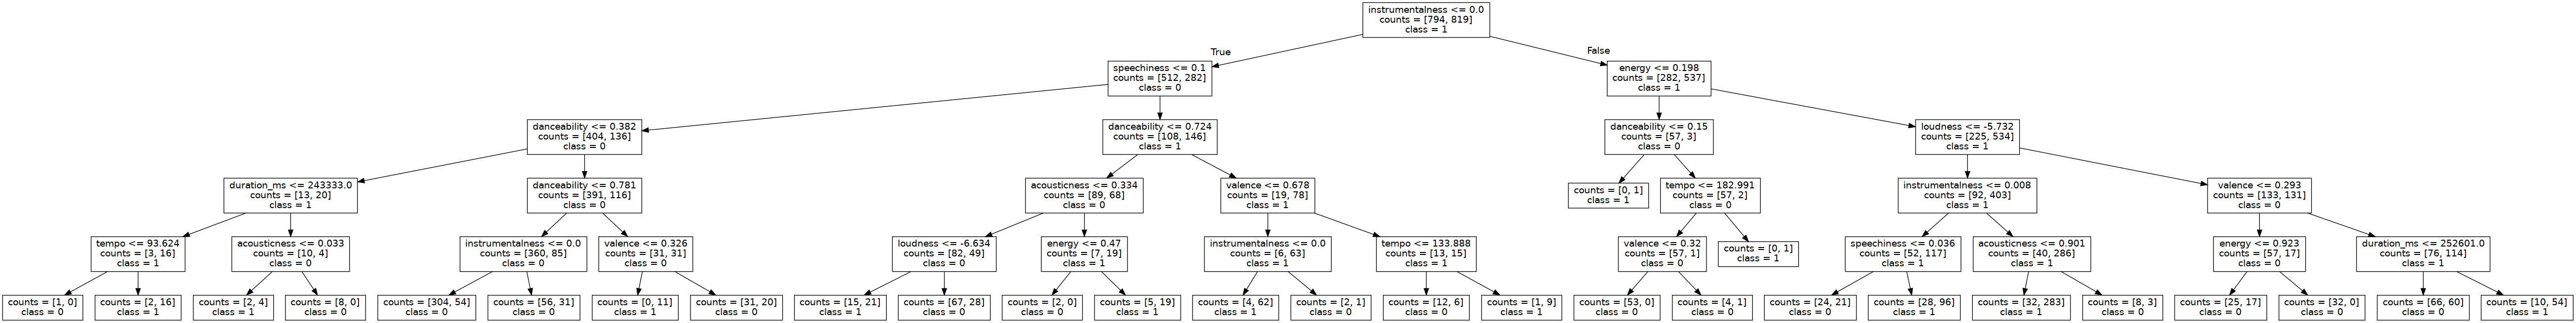

In [64]:
# Assuming that you have correctly set the variable toy_tree_viz
# the following code makes sure the tree is shown on Gradescope.
Image(spotify_tree_viz.pipe("png"))

In [65]:
assert not spotify_tree_viz is None, "Are you using the provided variable?"
assert not spotify_tree_viz.source is None, "spotify_tree_viz should be a decision tree"

In [66]:
assert not best_feat is None, "Are you setting the best_feat variable?"
assert sha1(best_feat.encode('utf-8')).hexdigest() == '6cd560e4ccffc46287399c5f226bb2cc95e8c987', "The best_feat seems incorrect"

<br><br>

### 4.6 Analysis
rubric={reasoning:6}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss. 
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_4.6
    
</div>

We see the test score is a bit higher compared to the cross-validation score. But I would not trust this result too much. Looking at the plot, we can see the cv score plot is quite "bumpy" and even if `max_depth=5` is a pretty good value, there is probably also some luck involved there.

If we are to pick `max_depth` simply based on the training data, it'll pick the lowest value for the parameter as it performs best on the training set. (See the table and plot in 5.1.) That said, that model would be overfit and it won't generalize well on the validation data. That's why we treat it as a hyperparameter and pick the best value based on the cross-validation accuracy. 

Whether the chosen `max_depth` generalizes to other users or not would depend upon how similar the new user is to this user. In other words, whether the training data for this user is representative of the new user or not. That said, the chosen `max_depth` of 5 would most like do better than if we had chosen a higher depth.  

<br><br><br><br>

## Exercise 5: Food for thought
<hr>

Each lab will have a few challenging questions. In some of the labs I will be including challenging questions which lead to the material in the upcoming week. These are usually low-risk questions and will contribute to maximum 5% of the lab grade. The main purpose here is to challenge yourself or dig deeper in a particular area. When you start working on labs, attempt all other questions before moving to these challenging questions. If you are running out of time, please skip the challenging questions. 

![](img/eva-game-on.png)

### (Challenging) 5.1 The index column in the spotify dataset
rubric={reasoning:1}

**Your tasks:**

1. In Exercise 2.1, I explicitly asked you to set the first column as the index column. What would happen if you would not have set it as an index column and treat that column as one of the features? What would be train and test accuracies in that case? Be clear and thorough in your answer.  

<div class="alert alert-warning">

Solution_5.1
    
</div>

This dataset is sorted on the target. So if you don't set the first column as the index column, it's pretty easy for `DecisionTreeClassifier` to come up with a threshold. For example, below we train the model when this feature is included in `X`. The model is a decision stump with a split on the this feature at value 1018. With this decision stump we'll get high train and test accuracies on this data but this is not a good generalizable model. 

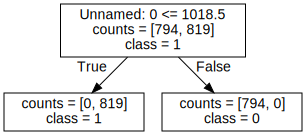

In [67]:
# BEGIN SOLUTION
spotify_no_ind_df = pd.read_csv("data/spotify.csv")
X = spotify_no_ind_df.drop(columns=["target", "artist", "song_title"])
y = spotify_no_ind_df["target"]
X_train_no_ind, X_test_no_ind, y_train_no_ind, y_test_no_ind = train_test_split(
    X, y, test_size=0.2, random_state=123
)

no_ind_tree = DecisionTreeClassifier(random_state=123)
no_ind_tree.fit(X_train_no_ind, y_train_no_ind)
tree_viz = display_tree(X_train_no_ind.columns, no_ind_tree, counts=True)
tree_viz
# END SOLUTION

In [68]:
# BEGIN SOLUTION
no_ind_tree.score(X_train_no_ind, y_train_no_ind)
# END SOLUTION

1.0

In [69]:
# BEGIN SOLUTION 
no_ind_tree.score(X_test_no_ind, y_test_no_ind)
# END SOLUTION

0.9975247524752475

<br><br>

### (Challenging) 5.2 Shuffling
rubric={reasoning:1}

By default, `train_test_split()` function shuffles the data before splitting. 

**Your tasks:**
1. What would be the consequences of splitting the data without shuffling it and using this unshuffled data in modeling?
2. Examine whether shuffling the data improves the CV scores and test score in the Spotify dataset.


<div class="alert alert-warning">

Solution_5.2
    
</div>

The test accuracies for both the `DummyClassifier` and the `DecisionTreeClassifier` when we split with shuffled data or when we used `train_test_split` are markedly better than when split without shuffling. The reason is that the dataset is sorted by the target. So when we split the data without shuffling, the model was mostly exposed to positive examples and not many negative examples.  

<br><br>

### (Challenging) 5.3 Exploring datasets and features
rubric={reasoning:2}

In Exercise 4.2, you systematically searched for a model using cross-validation that is likely to generalize well . 

**Your tasks:**

Give thoughtful answers to the questions below. 

1. Does this model use all the features provided to it? Which features seem most important? Does this match with what you observed in the exploratory data analysis? Briefly explain. 
2. Note that *acousticness* and *duration_ms* features are on a completely different scale. Does it matter when we learn a `DecisionTreeClassifier`? Briefly explain.  
3. Suppose you believe that *artist* is a useful feature in this task. How would you encode it in order to use it with `sklearn`? 

<div class="alert alert-warning">

Solution_5.3
    
</div>

<br><br><br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Push all your work to your GitHub lab repository. 
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. 
6. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

### Congratulations on finishing lab 1! Well done 👏👏! 

![](img/eva-well-done.png)